In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [2]:
# Surpress globally the use of exponential numbers
pd.options.display.float_format = '{:.4f}'.format

# #feature_importance.round(3) or do it manually with this code

In [3]:
dataset_path_USA = os.path.join('../../datasets/USA_houseprices_2014/')
file_name_USA = 'preprocessed_data_USAhouseprices2014.csv'
df = pd.read_csv(dataset_path_USA + file_name_USA)

X = df.drop(['price'], axis = 1)
y = df['price']

# Elastic Net

13 features, reduction of 0.00%


Text(0.5, 1.0, 'Elastic Net - Feature Weights for USA Housing Dataset')

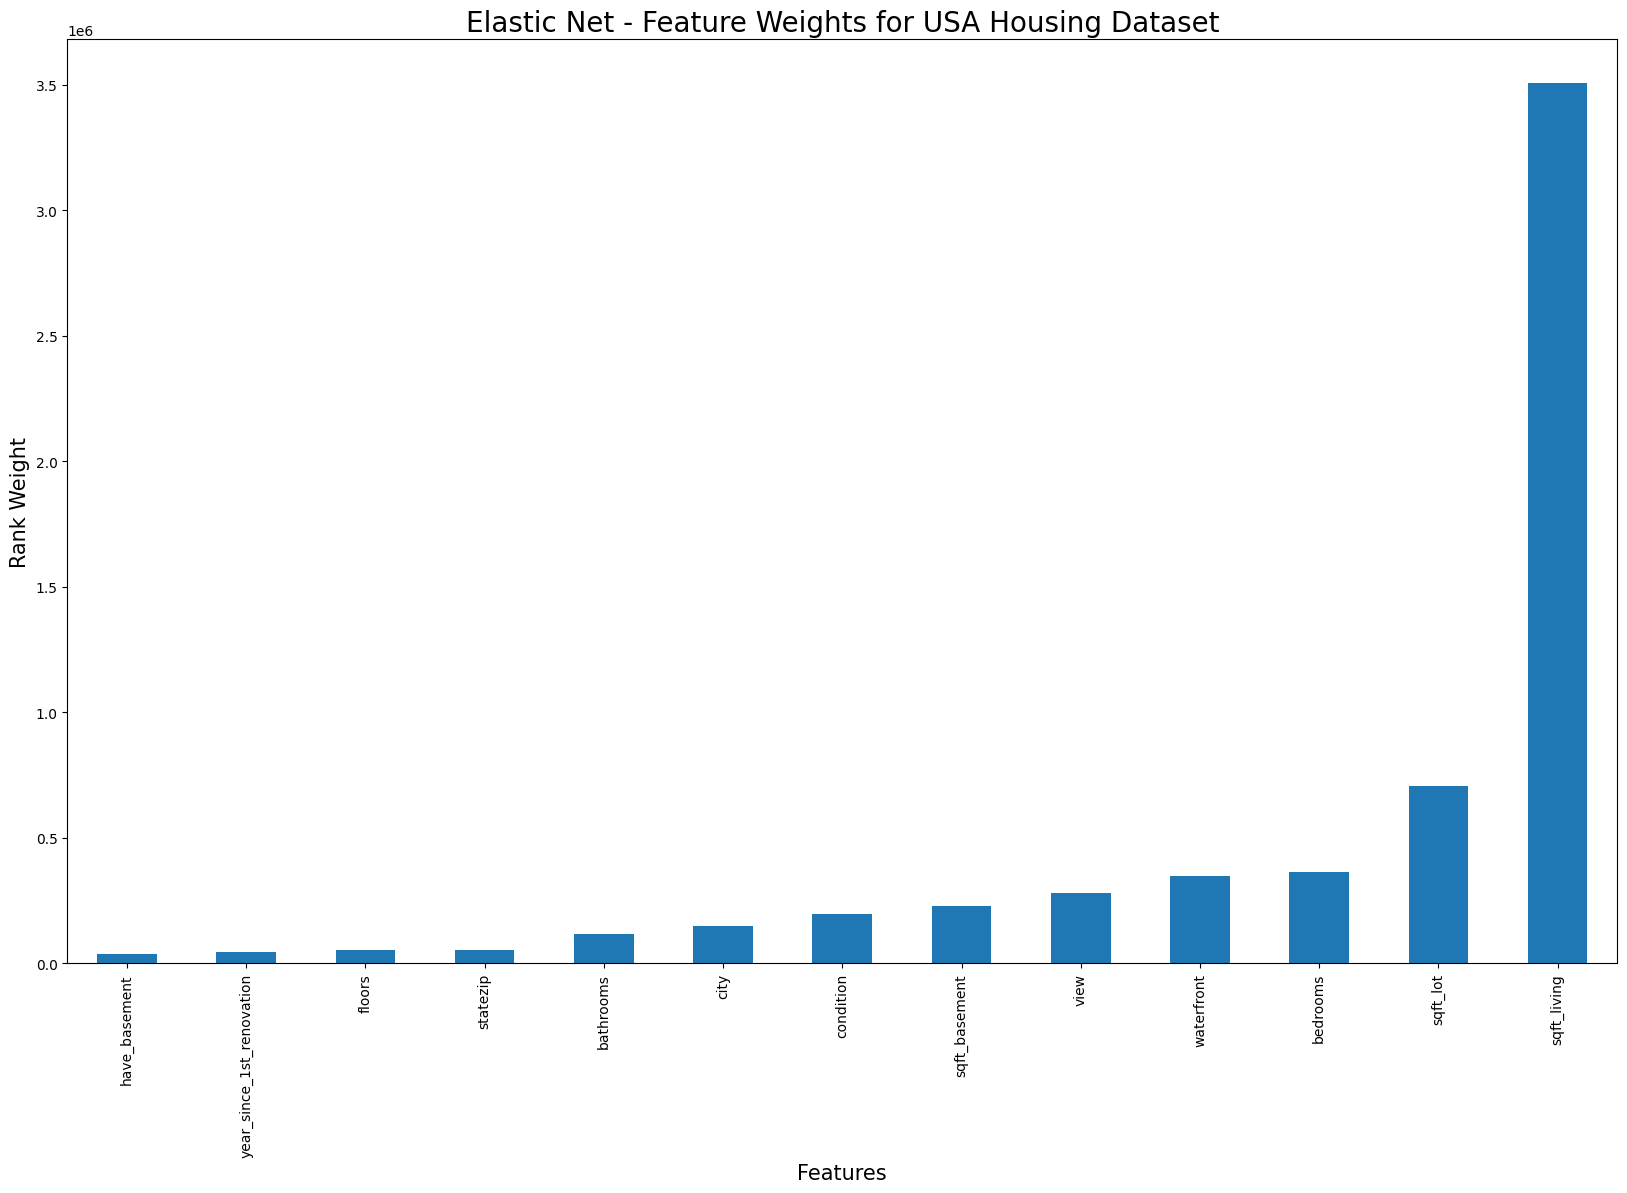

In [4]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        precompute='auto', max_iter=2500, tol=0.0001, cv=5, copy_X=True, verbose=0, n_jobs=-1, positive=False, 
                        random_state=42, selection='cyclic')

cv_model.fit(X, y)

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, random_state=42)
model.fit(X, y)

feature_importance_USA = pd.Series(index = X.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Elastic Net - Feature Weights for USA Housing Dataset', fontsize = 20)

Text(0.5, 1.0, 'Elastic Net - Feature Weights for USA Housing Dataset')

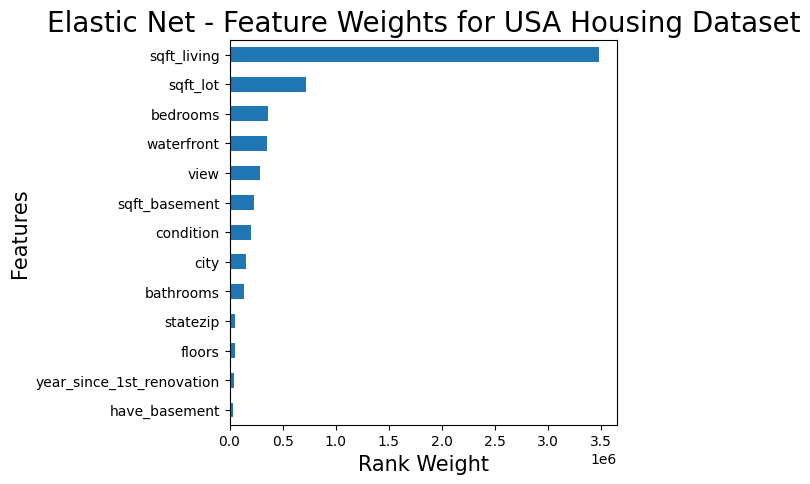

In [29]:
feature_importance_USA.sort_values().tail(30).plot(kind = 'barh', figsize = (5,5))
plt.ylabel('Features', fontsize = 15)
plt.xlabel('Rank Weight', fontsize = 15)
plt.title('Elastic Net - Feature Weights for USA Housing Dataset', fontsize = 20)

In [73]:
elastic_net_USA = feature_importance_USA.to_frame()
elastic_net_USA['method'] = 'elastic_net'
elastic_net_USA['dataset'] = 'USA_houseprices_2014'


elastic_net_USA = elastic_net_USA.reset_index(level = 0)
elastic_net_USA.rename(columns = {0: 'feature_rank', 'index': 'feature_name'}, inplace = True)

#To rank them instead of showing the coefficients
elastic_net_USA['feature_rank'] = elastic_net_USA['feature_rank'].rank(method='first', ascending=False)
elastic_net_USA

,feature_name,feature_rank,method,dataset
0,bedrooms,3.0000,elastic_net,USA_houseprices_2014
1,bathrooms,9.0000,elastic_net,USA_houseprices_2014
2,sqft_living,1.0000,elastic_net,USA_houseprices_2014
3,sqft_lot,2.0000,elastic_net,USA_houseprices_2014
4,floors,11.0000,elastic_net,USA_houseprices_2014
5,waterfront,4.0000,elastic_net,USA_houseprices_2014
6,view,5.0000,elastic_net,USA_houseprices_2014
7,condition,7.0000,elastic_net,USA_houseprices_2014
8,sqft_basement,6.0000,elastic_net,USA_houseprices_2014
9,year_since_1st_renovation,12.0000,elastic_net,USA_houseprices_2014


In [74]:
#elastic_net_USA.to_csv('../../data/cv_elastic_net/cv_featureranks_USA.csv', sep=';',index=False)

# Ridge Regression

13 features, reduction of 0.00%


Text(0.5, 1.0, 'Feature Weights for USA Housing Dataset')

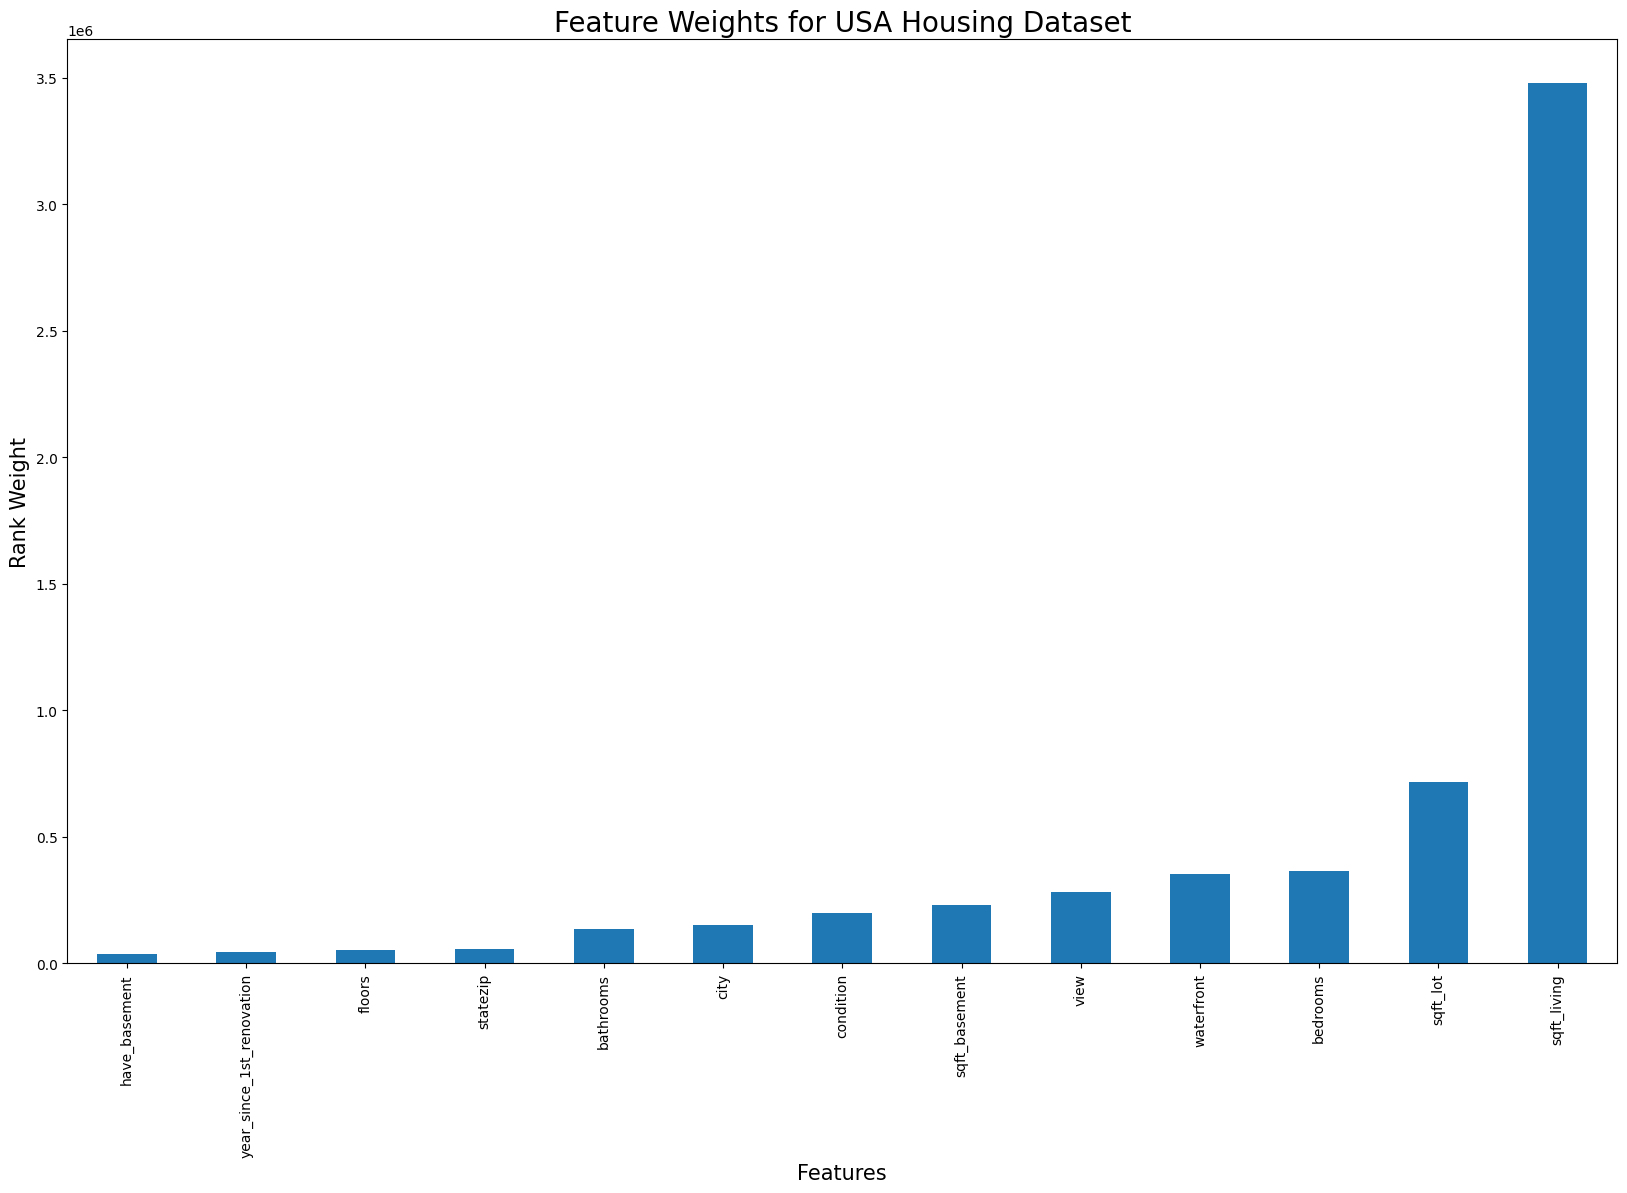

In [23]:
from sklearn.linear_model import RidgeCV

cv_model = RidgeCV(alphas = (0.1, 1.0, 10.0, 100.0), fit_intercept=True, cv=5)

cv_model.fit(X, y)

model = Ridge(alpha = cv_model.alpha_, fit_intercept=True, random_state=42)
model.fit(X, y)

feature_importance_USA = pd.Series(index = X.columns, data = np.abs(model.coef_))

n_selected_features = (feature_importance_USA>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_USA))*100))

feature_importance_USA.sort_values().tail(30).plot(kind = 'bar', figsize = (20,12))
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Feature Weights for USA Housing Dataset', fontsize = 20)

# Decision Tree

Text(0.5, 1.0, 'CART - Feature Weights for USA Housing Dataset')

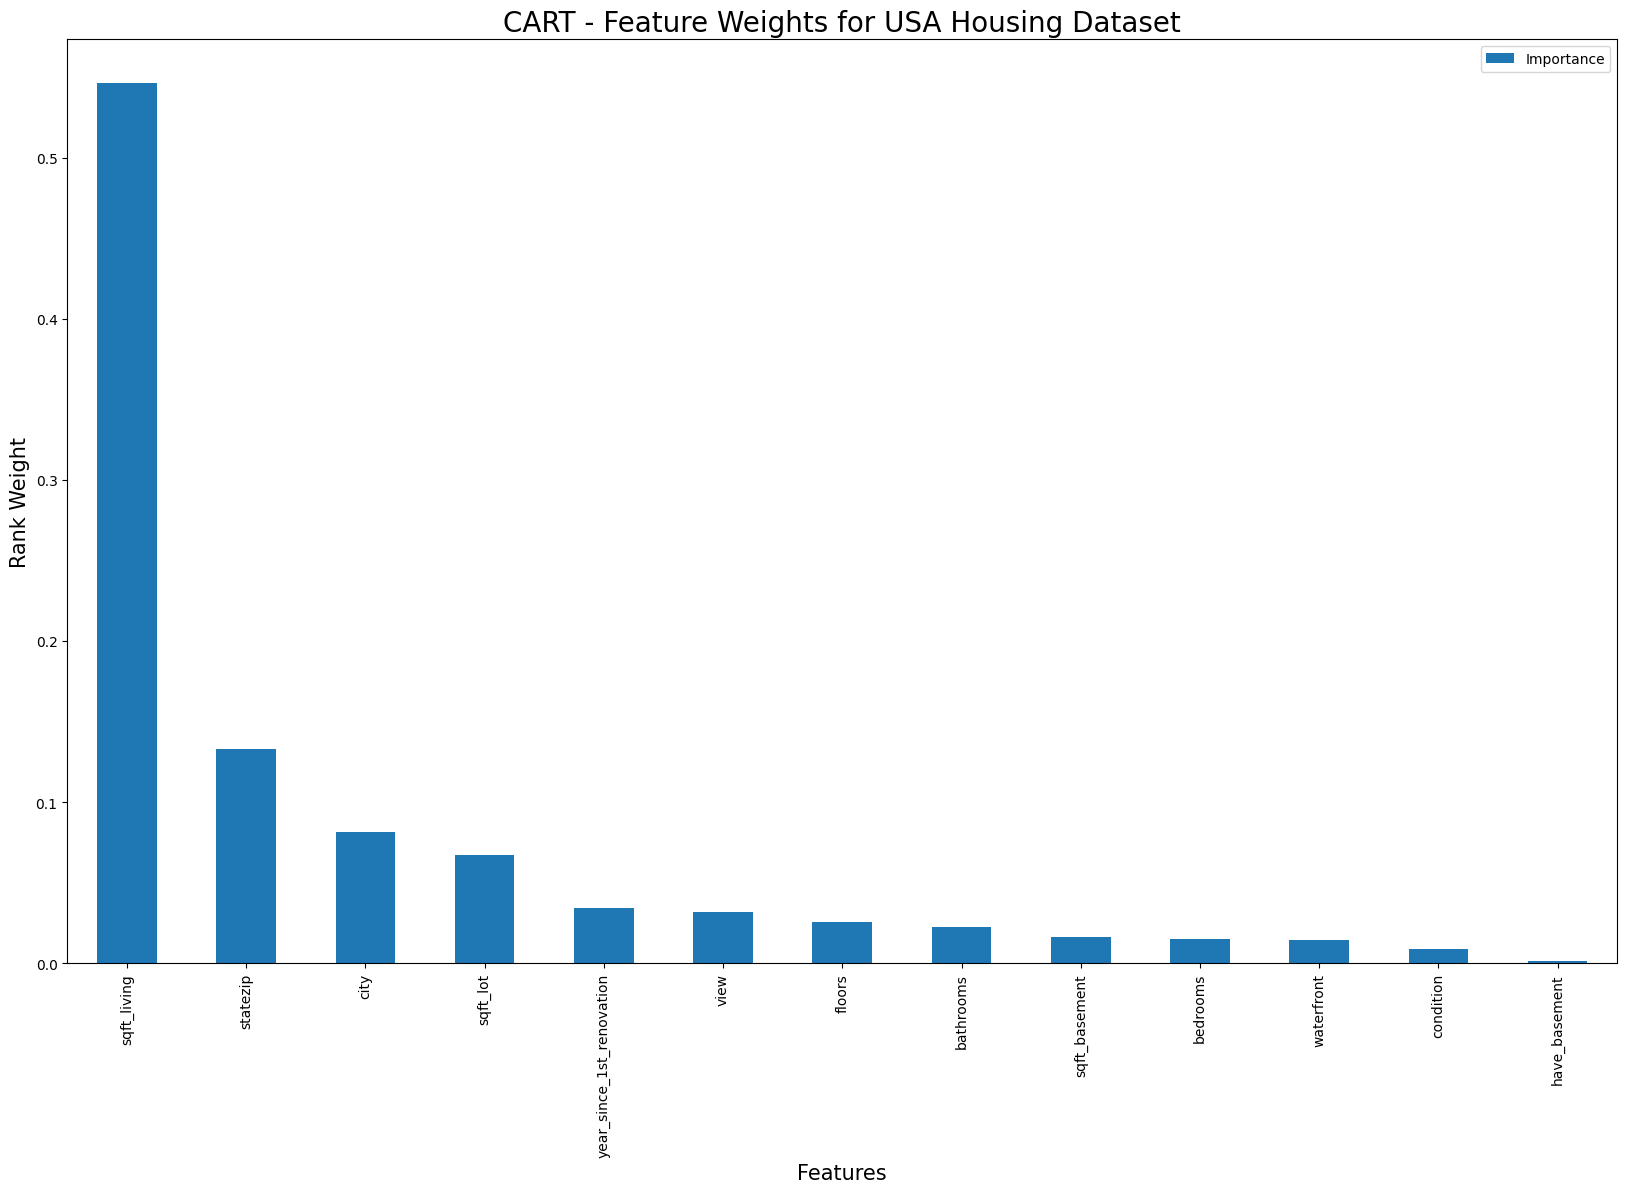

In [75]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state =  42)
# Train model
model = dtr.fit(X, y)

feat_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(20,12))

plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('CART - Feature Weights for USA Housing Dataset', fontsize = 20)

In [76]:
output = cross_validate(dtr, X.values, y, cv=5, scoring = 'neg_mean_squared_error', return_estimator =True)

for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for Decision Tree estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                           importance
sqft_living                    0.5430
statezip                       0.1366
city                           0.0797
sqft_lot                       0.0677
view                           0.0371
year_since_1st_renovation      0.0317
bathrooms                      0.0299
floors                         0.0185
sqft_basement                  0.0179
condition                      0.0143
bedrooms                       0.0127
waterfront                     0.0080
have_basement                  0.0028
Features sorted by their score for estimator 1:
                           importance
sqft_living                    0.5441
statezip                       0.1178
city                           0.0757
sqft_lot                       0.0572
bathrooms                      0.0442
view                           0.0323
year_since_1st_renovation      0.0285
sqft_basement                  0.0273
floors                        

# Random Forest

Text(0.5, 1.0, 'Random Forest - Feature Weights for USA Housing Dataset')

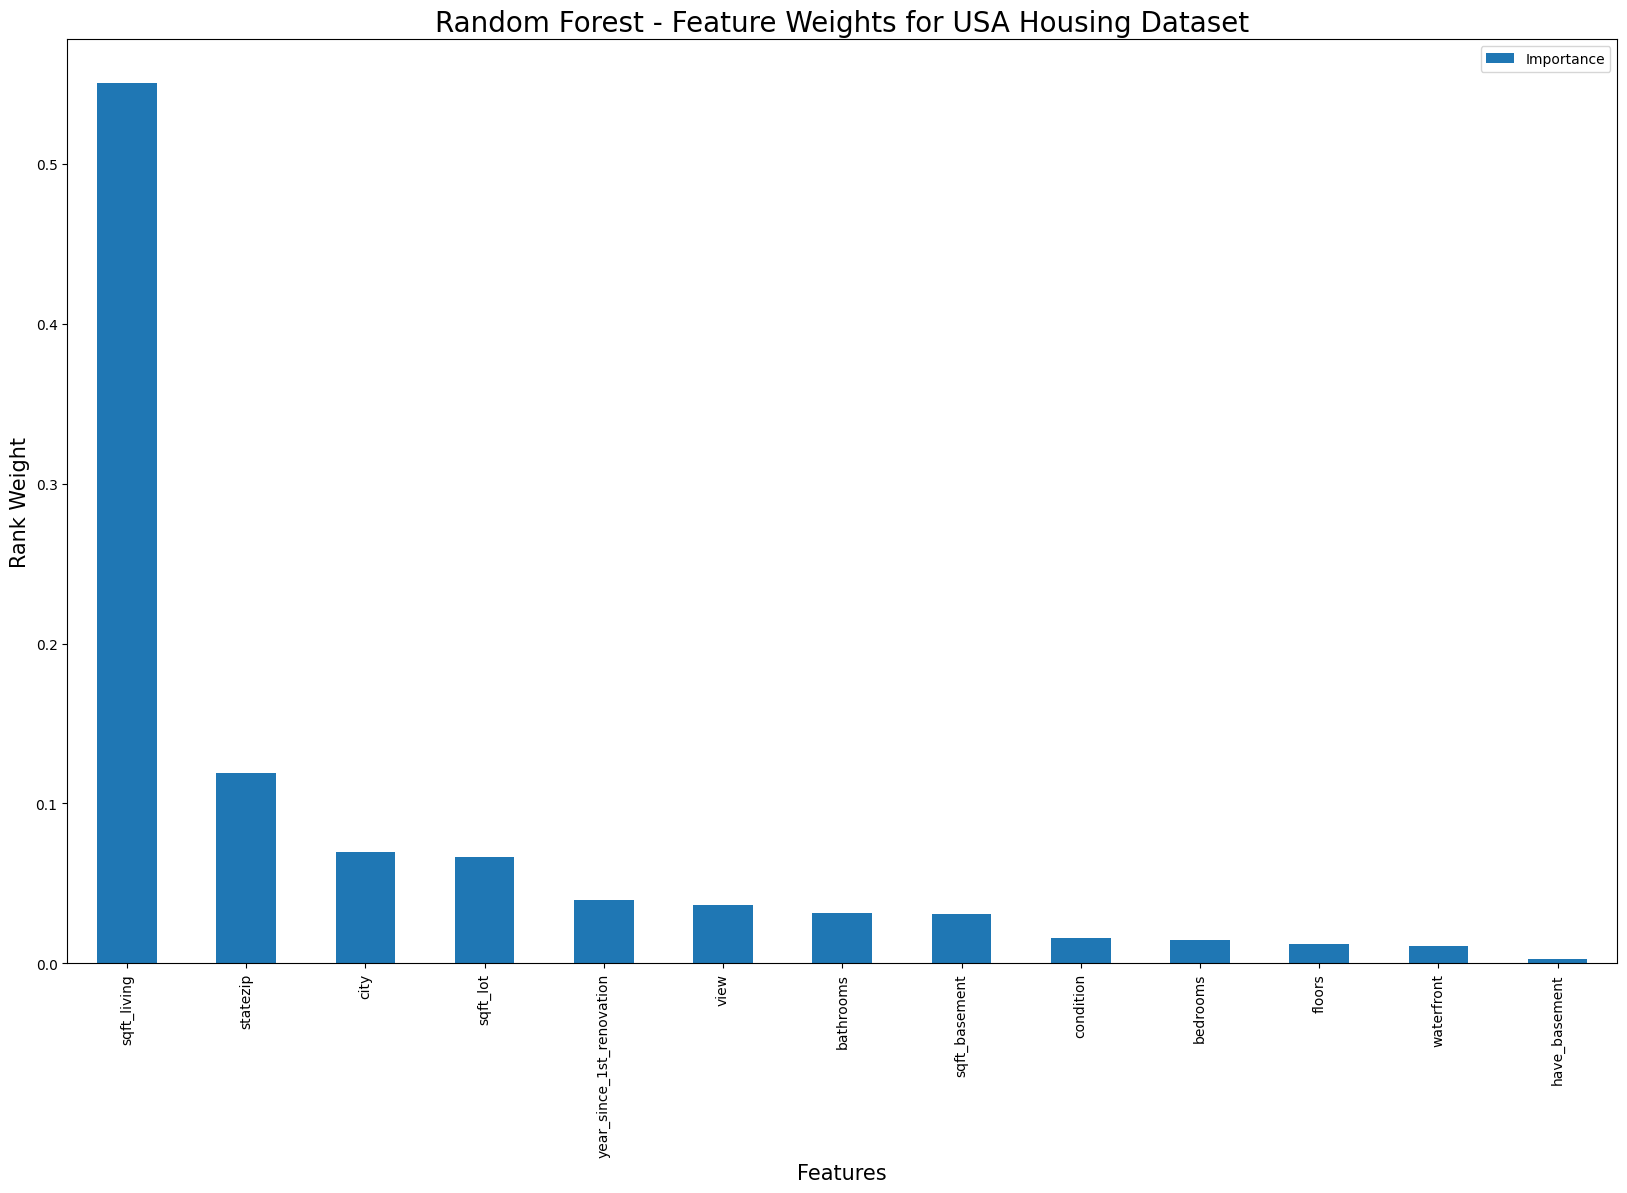

In [79]:
clf = RandomForestRegressor(random_state =  42, n_jobs=-1)
# Train model
model = clf.fit(X, y)

feat_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(20,12))

plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rank Weight', fontsize = 15)
plt.title('Random Forest - Feature Weights for USA Housing Dataset', fontsize = 20)

In [80]:
output = cross_validate(clf, X.values, y, cv=5, scoring = 'neg_mean_squared_error', return_estimator =True)

for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                           importance
sqft_living                    0.5463
statezip                       0.1143
city                           0.0692
sqft_lot                       0.0666
year_since_1st_renovation      0.0418
sqft_basement                  0.0389
bathrooms                      0.0360
view                           0.0347
condition                      0.0172
bedrooms                       0.0141
floors                         0.0118
waterfront                     0.0060
have_basement                  0.0031
Features sorted by their score for estimator 1:
                           importance
sqft_living                    0.5490
statezip                       0.1115
city                           0.0658
sqft_lot                       0.0633
year_since_1st_renovation      0.0430
view                           0.0383
sqft_basement                  0.0354
bathrooms                      0.0306
condition                     

# T-Tests

In [24]:
df_RF = pd.read_csv('../../data/cross_validation_USA/cv_RF.csv')
df_RF = df_RF.set_index('feature_name').transpose()

df_RF.describe()

feature_name,sqft_living,statezip,city,sqft_lot,year_since_1st_renovation,sqft_basement,bathrooms,view,condition,bedrooms,floors,waterfront,have_basement
count,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
mean,0.5544,0.1130,0.0673,0.0650,0.0422,0.0335,0.0337,0.0348,0.0163,0.0145,0.0120,0.0098,0.0032
std,0.0134,0.0049,0.0019,0.0023,0.0027,0.0042,0.0037,0.0035,0.0019,0.0008,0.0013,0.0022,0.0002
min,0.5463,0.1072,0.0649,0.0619,0.0376,0.0289,0.0289,0.0291,0.0145,0.0135,0.0105,0.0060,0.0029
25%,0.5464,0.1115,0.0658,0.0633,0.0418,0.0296,0.0306,0.0347,0.0150,0.0141,0.0112,0.0104,0.0031
50%,0.5490,0.1117,0.0683,0.0660,0.0430,0.0348,0.0360,0.0360,0.0157,0.0146,0.0118,0.0105,0.0032
75%,0.5522,0.1143,0.0685,0.0666,0.0440,0.0354,0.0360,0.0361,0.0172,0.0151,0.0133,0.0106,0.0033
max,0.5779,0.1205,0.0692,0.0674,0.0444,0.0389,0.0372,0.0383,0.0193,0.0154,0.0134,0.0117,0.0034


In [25]:
df_CART = pd.read_csv('../../data/cross_validation_USA/cv_CART.csv')
df_CART = df_CART.set_index('feature_name').transpose()

df_CART.describe()

feature_name,sqft_living,statezip,city,sqft_lot,view,year_since_1st_renovation,bathrooms,floors,sqft_basement,condition,bedrooms,waterfront,have_basement
count,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
mean,0.5482,0.1244,0.0768,0.0683,0.0328,0.0298,0.0340,0.0179,0.0234,0.0145,0.0128,0.0140,0.0032
std,0.0062,0.0073,0.0040,0.0094,0.0067,0.0046,0.0072,0.0058,0.0041,0.0020,0.0023,0.0048,0.0016
min,0.5430,0.1178,0.0706,0.0572,0.0217,0.0231,0.0252,0.0096,0.0179,0.0111,0.0101,0.0080,0.0020
25%,0.5441,0.1199,0.0757,0.0623,0.0323,0.0285,0.0299,0.0155,0.0202,0.0143,0.0114,0.0095,0.0022
50%,0.5446,0.1232,0.0773,0.0677,0.0337,0.0301,0.0336,0.0185,0.0254,0.0151,0.0127,0.0166,0.0028
75%,0.5517,0.1246,0.0797,0.0729,0.0371,0.0317,0.0372,0.0211,0.0261,0.0156,0.0133,0.0177,0.0031
max,0.5575,0.1366,0.0809,0.0814,0.0390,0.0356,0.0442,0.0250,0.0273,0.0164,0.0163,0.0180,0.0059


In [26]:
df_CART.describe()

feature_name,sqft_living,statezip,city,sqft_lot,view,year_since_1st_renovation,bathrooms,floors,sqft_basement,condition,bedrooms,waterfront,have_basement
count,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
mean,0.5482,0.1244,0.0768,0.0683,0.0328,0.0298,0.0340,0.0179,0.0234,0.0145,0.0128,0.0140,0.0032
std,0.0062,0.0073,0.0040,0.0094,0.0067,0.0046,0.0072,0.0058,0.0041,0.0020,0.0023,0.0048,0.0016
min,0.5430,0.1178,0.0706,0.0572,0.0217,0.0231,0.0252,0.0096,0.0179,0.0111,0.0101,0.0080,0.0020
25%,0.5441,0.1199,0.0757,0.0623,0.0323,0.0285,0.0299,0.0155,0.0202,0.0143,0.0114,0.0095,0.0022
50%,0.5446,0.1232,0.0773,0.0677,0.0337,0.0301,0.0336,0.0185,0.0254,0.0151,0.0127,0.0166,0.0028
75%,0.5517,0.1246,0.0797,0.0729,0.0371,0.0317,0.0372,0.0211,0.0261,0.0156,0.0133,0.0177,0.0031
max,0.5575,0.1366,0.0809,0.0814,0.0390,0.0356,0.0442,0.0250,0.0273,0.0164,0.0163,0.0180,0.0059


In [27]:
from scipy.stats import ttest_ind

cat1 = df_CART[df_CART['Category']=='cat1']
cat2 = df_CART[df_CART['Category']=='cat2']

ttest_ind(cat1['values'], cat2['values'])

KeyError: 'Category'